## Exercises

Select a dataset with a continuous target variable.

Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

In [2]:
#Read in the tips dataset
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
#Split my data
seed = 42

train, test_val = train_test_split(df, train_size=0.7,
                                   random_state=seed)

test, valid = train_test_split(test_val, train_size=0.5,
                               random_state=seed)

In [4]:
#Verify it was split correctly
print('Train shape: {}.'.format(train.shape))
print('Validation shape: {}.'.format(valid.shape))
print('Test shape: {}.'.format(test.shape))

Train shape: (170, 7).
Validation shape: (37, 7).
Test shape: (37, 7).


Text(0, 0.5, 'Frequency')

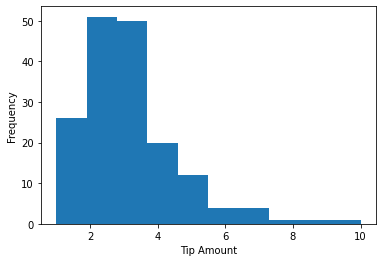

In [5]:
#Visualize my target variable
plt.hist(train.tip)
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')

In [6]:
#Establish baselines for the train and validation subsets
baseline = train.tip.mean()

train['baseline'] = baseline
valid['baseline'] = baseline

train_rmse = sqrt(mean_squared_error(train.tip, train.baseline))
valid_rmse = sqrt(mean_squared_error(valid.tip, valid.baseline))

print('Train baseline RMSE: {}.'.format(train_rmse))
print('Validation baseline RMSE: {}.'.format(valid_rmse))

Train baseline RMSE: 1.4613833281633912.
Validation baseline RMSE: 1.0526428585051797.


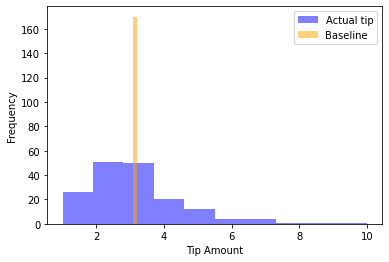

In [7]:
#Plot my train baseline against the actual tip distribution
plt.hist(train.tip, color='blue', alpha=0.5, label='Actual tip')
plt.hist(train.baseline, color='orange', alpha=0.5, label='Baseline')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.legend()

In [8]:
#Define a function to create dummies for my categorical columns
def dummy_detector(df):
    
    dummy_df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time', 'size'])
    dummy_df.drop(columns=['sex_Female', 'smoker_No', 'baseline'],
                  axis=1, inplace=True)
    
    X = dummy_df.drop(columns=['tip'])
    y = pd.DataFrame(dummy_df['tip'])
    
    return X, y

In [9]:
#I had to add this column in order for dummy_detector to work on test
test['baseline'] = 0

In [10]:
#Create train and validate dataframes for X and y
X_train, y_train = dummy_detector(train)
X_valid, y_valid = dummy_detector(valid)
X_test, y_test = dummy_detector(test)

In [11]:
#Check the shape of the X subsets
X_train.shape, X_valid.shape, X_test.shape

((170, 15), (37, 14), (37, 15))

In [12]:
#What's missing here?
X_valid.head()

,total_bill,sex_Male,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5
199,13.00,0,1,0,0,0,1,0,1,0,1,0,0,0
226,16.27,0,1,1,0,0,0,0,1,0,1,0,0,0
67,16.45,0,0,0,1,0,0,1,0,0,1,0,0,0
25,19.82,1,0,0,1,0,0,1,0,0,1,0,0,0
160,16.49,1,0,0,0,1,0,1,0,0,0,0,1,0


In [13]:
#Create a new column to match the shape of X_train
X_valid['size_6'] = 0

In [14]:
#Verify the addition was successful
X_valid.head()

,total_bill,sex_Male,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6
199,13.00,0,1,0,0,0,1,0,1,0,1,0,0,0,0
226,16.27,0,1,1,0,0,0,0,1,0,1,0,0,0,0
67,16.45,0,0,0,1,0,0,1,0,0,1,0,0,0,0
25,19.82,1,0,0,1,0,0,1,0,0,1,0,0,0,0
160,16.49,1,0,0,0,1,0,1,0,0,0,0,1,0,0


In [15]:
#Instantiate the min-max scaler and fit/transform my continuous feature
mms = MinMaxScaler()

mms.fit(X_train[['total_bill']])

X_train[['total_bill']] = mms.transform(X_train[['total_bill']])

X_valid[['total_bill']] = mms.transform(X_valid[['total_bill']])

X_test[['total_bill']] = mms.transform(X_test[['total_bill']])

In [16]:
#Verify
X_train.head()

,total_bill,sex_Male,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,size_1,size_2,size_3,size_4,size_5,size_6
235,0.217044,1,1,0,1,0,0,1,0,0,1,0,0,0,0
228,0.326232,1,0,0,1,0,0,1,0,0,0,0,1,0,0
181,0.641367,1,1,0,0,1,0,1,0,0,0,0,1,0,0
6,0.433644,1,0,0,0,1,0,1,0,0,0,0,1,0,0
57,0.715934,1,1,0,1,0,0,1,0,0,0,0,1,0,0


In [17]:
#Instantiate the linear regression model and fit it to the data
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [18]:
#Instantiate lars and fit
lars = LassoLars(alpha=1.0)

lars.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoLars()

In [19]:
#Instantiate TweedieRegressor and fit
glm = TweedieRegressor(power=0, alpha=1)

glm.fit(X_train, y_train.tip)

TweedieRegressor(alpha=1, power=0)

In [20]:
#Create a looping statement to evaluate all models
models = [lm, lars, glm]

for model in models:
    y_train[str(model)] = model.predict(X_train)
    rmse_train = sqrt(mean_squared_error(y_train['tip'],
                                         y_train[str(model)]))
    
    y_valid[str(model)] = model.predict(X_valid)
    rmse_valid = sqrt(mean_squared_error(y_valid['tip'],
                                         y_valid[str(model)]))
    
    print('RMSE for {} model on the train dataset: {}.'.format(model, round(rmse_train, 2)))
    print('RMSE for {} model on the validate dataset: {}.'.format(model, round(rmse_valid, 2)))
    print()

RMSE for LinearRegression() model on the train dataset: 1.04.
RMSE for LinearRegression() model on the validate dataset: 0.96.

RMSE for LassoLars() model on the train dataset: 1.46.
RMSE for LassoLars() model on the validate dataset: 1.05.

RMSE for TweedieRegressor(alpha=1, power=0) model on the train dataset: 1.36.
RMSE for TweedieRegressor(alpha=1, power=0) model on the validate dataset: 1.02.



In [21]:
#Rename my columns so they're easier to access
y_valid.rename(columns={'LinearRegression()': 'lm', 'LassoLars()': 'lars',
                        'TweedieRegressor(alpha=1, power=0)': 'glm'}, inplace=True)

In [22]:
#Verify I renamed them correctly
y_valid.columns

Index(['tip', 'lm', 'lars', 'glm'], dtype='object')

Text(0.5, 1.0, 'Actual tip vs predicted tip across all models')

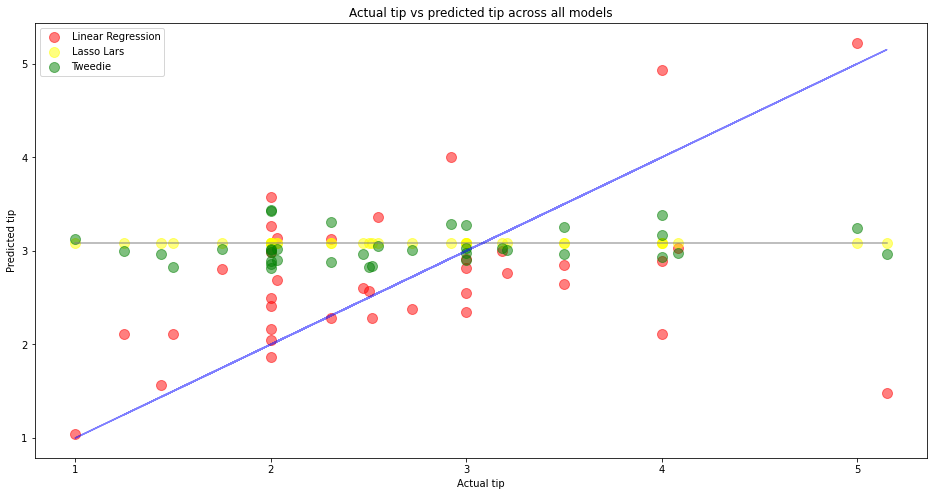

In [23]:
#Plot the predicted tips against the actual tips, with baseline
plt.figure(figsize=(16,8))

plt.plot(y_valid['tip'], valid['baseline'], alpha=0.5,
         color='gray', label='_nolegend_')
plt.plot(valid['tip'], valid['tip'], alpha=0.5,
         color='blue', label='_nolegend_')

plt.scatter(y_valid['tip'], y_valid['lm'], alpha=0.5,
            color='red', s=100, label='Linear Regression')
plt.scatter(y_valid['tip'], y_valid['lars'], alpha=0.5,
            color='yellow', s=100, label='Lasso Lars')
plt.scatter(y_valid['tip'], y_valid['glm'], alpha=0.5,
            color='green', s=100, label='Tweedie')

plt.legend()
plt.xlabel('Actual tip')
plt.ylabel('Predicted tip')
plt.title('Actual tip vs predicted tip across all models')

Text(0.5, 1.0, 'Residual plot')

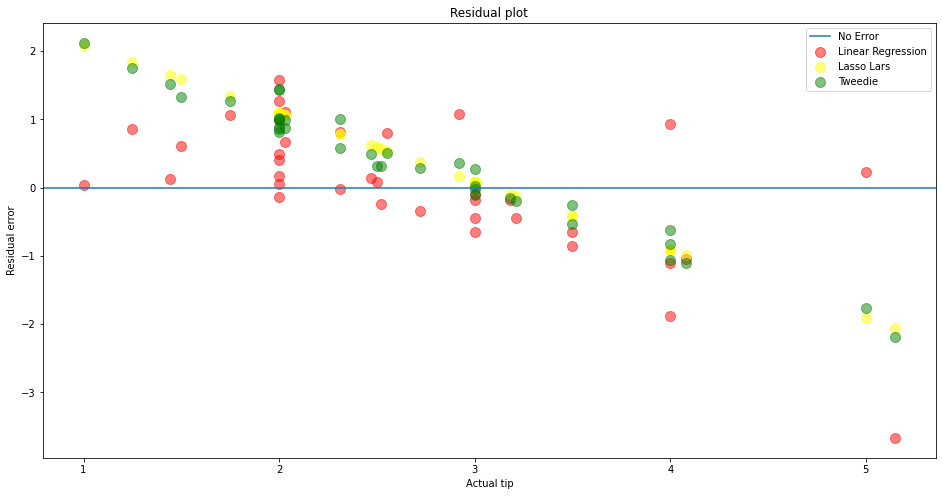

In [24]:
#Residual plot of the same information
plt.figure(figsize=(16,8))
plt.axhline(label='No Error')

plt.scatter(y_valid['tip'], y_valid['lm'] - y_valid['tip'], alpha=0.5,
            color='red', s=100, label='Linear Regression')
plt.scatter(y_valid['tip'], y_valid['lars'] - y_valid['tip'], alpha=0.5,
            color='yellow', s=100, label='Lasso Lars')
plt.scatter(y_valid['tip'], y_valid['glm'] - y_valid['tip'], alpha=0.5,
            color='green', s=100, label='Tweedie')

plt.legend()
plt.xlabel('Actual tip')
plt.ylabel('Residual error')
plt.title('Residual plot')

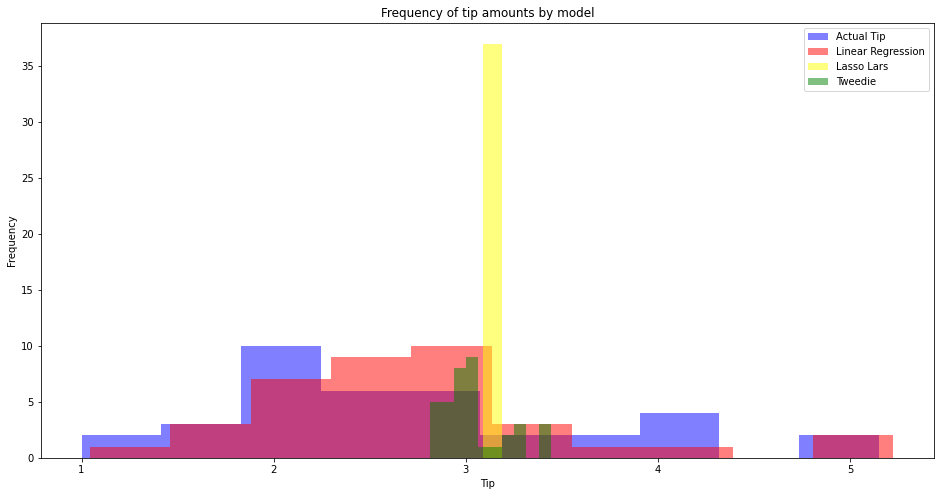

In [25]:
#Distribution of my models' predictions
plt.figure(figsize=(16,8))

plt.hist(y_valid['tip'], color='blue', alpha=0.5, label='Actual Tip')
plt.hist(y_valid['lm'], color='red', alpha=0.5, label='Linear Regression')
plt.hist(y_valid['lars'], color='yellow', alpha=0.5, label='Lasso Lars')
plt.hist(y_valid['glm'], color='green', alpha=0.5, label='Tweedie')

plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.title('Frequency of tip amounts by model')
plt.legend()

In [26]:
#Evaluate the best performing model on the test subset
y_test['lm'] = lm.predict(X_test)

rmse_test = sqrt(mean_squared_error(y_test['tip'], y_test['lm']))

print('RMSE for OLS model on the test dataset: {}.'.format(rmse_test))

RMSE for OLS model on the test dataset: 0.9667891753484866.
